<a href="https://colab.research.google.com/github/Laaliji/Colon-Cancer-Gene-Expression-Data-Classification-Analysis/blob/main/TP1_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activité pratique 1 : Méthodologie de Recherche : Analyse de l'Expression des Gènes du Cancer du Côlon

## Bibliothèques et Configurations

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#Configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## Préparation des données

### Exploratory data analysis (EDA)

In [6]:
#Charger les données
df = pd.read_csv('colon_cancer.csv', sep=';')

In [7]:
# Aperçu général sur le dataset
print("\nInformations sur le dataset: ")
print(df.info())
print("Aperçu des données: ")
print(df.head(5))


Informations sur le dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_sample      804 non-null    object 
 1   ADH1C          804 non-null    float64
 2   DHRS11         804 non-null    float64
 3   UGP2           804 non-null    float64
 4   SLC7A5         804 non-null    float64
 5   CTSS           804 non-null    float64
 6   DAO            804 non-null    float64
 7   NIBAN1         804 non-null    float64
 8   PRUNE2         804 non-null    float64
 9   FOXF2          804 non-null    float64
 10  TENT5C         804 non-null    float64
 11  KLF10          804 non-null    float64
 12  FABP1          804 non-null    float64
 13  RPSAP19        804 non-null    float64
 14  NCAPH          804 non-null    float64
 15  TPM1           804 non-null    float64
 16  PLA2G12B       804 non-null    float64
 17  PLAAT4         804 non-


Valeurs manquantes par colonne :
id_sample        0
ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
CTSS             0
DAO              0
NIBAN1           0
PRUNE2           0
FOXF2            0
TENT5C           0
KLF10            0
FABP1            0
RPSAP19          0
NCAPH            0
TPM1             0
PLA2G12B         0
PLAAT4           0
IGLV8-61         0
GSS              0
L1TD1            0
RNF186           0
HES2             0
MXRA8            0
SOX18            0
NDFIP2           0
SIAE             0
NEURL1B          0
DDIT4            0
TRPM4            0
RETREG1          0
OTULINL          0
CPVL             0
SAMD9            0
ANKRD40CL        0
EPN3             0
CRYBG2           0
GIPC2            0
P3H2             0
STEAP3           0
THNSL2           0
TRAPPC14         0
RHBDL2           0
RPP25            0
SEMA4C           0
RNF43            0
EPS8L1           0
TOR4A            0
PAQR5            0
SIDT1            0
ESRP1           

<Axes: >

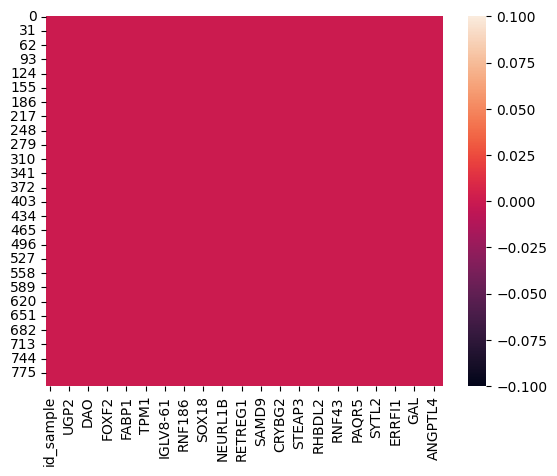

In [8]:
# Vérifier les valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

print("\nHeatmap des valeurs manquantes :")
sns.heatmap(df.isnull())


Distribution des classes :
tissue_status
normal     402
tumoral    402
Name: count, dtype: int64


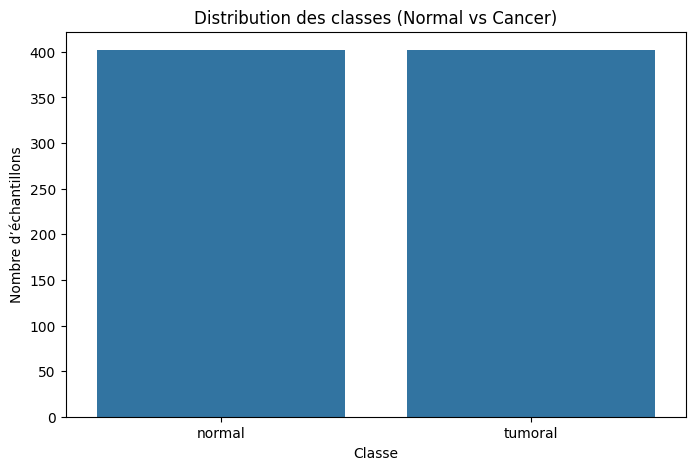


Pourcentage des classes :
tissue_status
normal     50.0
tumoral    50.0
Name: proportion, dtype: float64


In [9]:
# Compte des classes
print("\nDistribution des classes :")
print(df["tissue_status"].value_counts())

# Visualisation
plt.figure(figsize=(8, 5))
sns.countplot(x="tissue_status", data=df)
plt.title("Distribution des classes (Normal vs Cancer)")
plt.xlabel("Classe")
plt.ylabel("Nombre d’échantillons")
plt.show()

# Pourcentage
print("\nPourcentage des classes :")
print(df["tissue_status"].value_counts(normalize=True) * 100)

In [10]:
#Analyse descriptive
# Supprime id_sample pour les stats (inutile)
features = df.drop(columns=["id_sample", "tissue_status"])

# Statistiques descriptives
print("\nStatistiques descriptives des gènes avant standardisation:")
print(features.describe())



Statistiques descriptives des gènes avant standardisation:
            ADH1C      DHRS11        UGP2      SLC7A5        CTSS         DAO      NIBAN1      PRUNE2       FOXF2      TENT5C       KLF10       FABP1     RPSAP19       NCAPH        TPM1    PLA2G12B      PLAAT4    IGLV8-61         GSS       L1TD1      RNF186        HES2       MXRA8       SOX18      NDFIP2        SIAE     NEURL1B       DDIT4       TRPM4     RETREG1     OTULINL        CPVL       SAMD9   ANKRD40CL        EPN3      CRYBG2       GIPC2        P3H2      STEAP3      THNSL2    TRAPPC14      RHBDL2       RPP25      SEMA4C       RNF43      EPS8L1       TOR4A       PAQR5       SIDT1       ESRP1       SYTL2       BSPRY       CDHR2      ERRFI1       CLIC5        PLLP         GAL       CRYL1        YBX2     ANGPTL4
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804

**Problème:** Les gènes ont des échelles très différentes. Par exemple, FABP1 a une moyenne de 8.036 et un écart-type de 3.021, tandis que PLLP a une moyenne de 1.823 et un écart-type de 0.722. Si on ne standardise pas, un gène comme FABP1 (avec de grandes valeurs) dominera les calculs simplement à cause de son échelle, même s’il n’est pas plus "important".

**Solution proposée:** La standardisation ramène toutes les variables à la même échelle (moyenne = 0, écart-type = 1). Ainsi, un changement d’une unité dans FABP1 a le même "poids" qu’un changement d’une unité dans PLLP, ce qui permet au modèle de comparer leur influence de manière équitable.

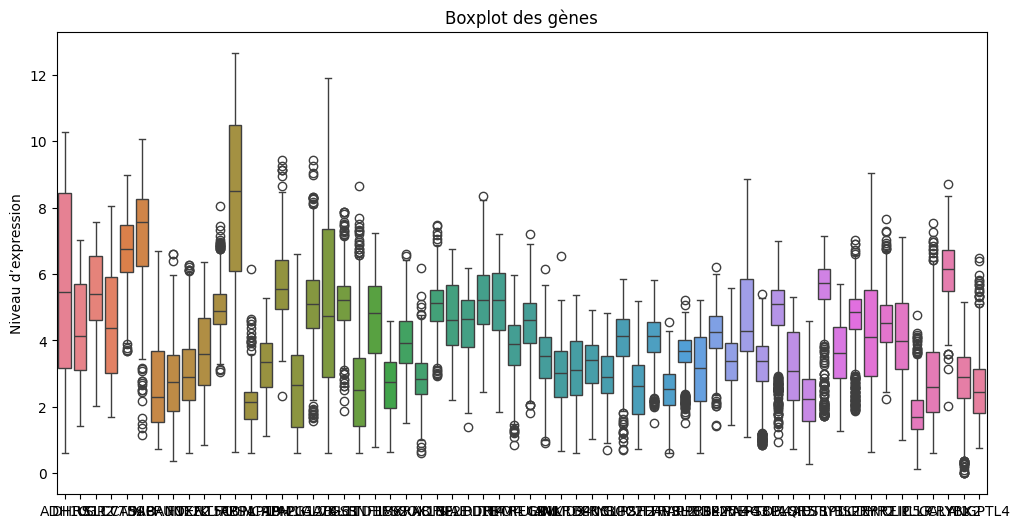

In [11]:
#Visualisation de la distribution des expressions des gènes et les outliers avec le boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.title("Boxplot des gènes")
plt.ylabel("Niveau d’expression")
plt.show()

In [12]:
# Analyse des outliers pour chaque gène en utilisant la méthode de l'écart interquartile (IQR)
# On calcule Q1 (25e percentile) et Q3 (75e percentile), puis l'IQR (Q3 - Q1).
# Les outliers sont définis comme les valeurs < Q1 - 1.5*IQR ou > Q3 + 1.5*IQR.
for gene in features.columns:
    Q1 = features[gene].quantile(0.25)
    Q3 = features[gene].quantile(0.75)
    IQR = Q3 - Q1
    outliers = features[(features[gene] < (Q1 - 1.5 * IQR)) | (features[gene] > (Q3 + 1.5 * IQR))]
    if not outliers.empty:
        print(f"Gène {gene} : {len(outliers)} outliers")

Gène CTSS : 5 outliers
Gène DAO : 15 outliers
Gène PRUNE2 : 3 outliers
Gène FOXF2 : 7 outliers
Gène KLF10 : 23 outliers
Gène RPSAP19 : 16 outliers
Gène TPM1 : 8 outliers
Gène PLAAT4 : 25 outliers
Gène GSS : 26 outliers
Gène L1TD1 : 19 outliers
Gène MXRA8 : 2 outliers
Gène SOX18 : 10 outliers
Gène NDFIP2 : 13 outliers
Gène NEURL1B : 1 outliers
Gène DDIT4 : 1 outliers
Gène RETREG1 : 8 outliers
Gène OTULINL : 5 outliers
Gène CPVL : 3 outliers
Gène SAMD9 : 1 outliers
Gène CRYBG2 : 1 outliers
Gène GIPC2 : 16 outliers
Gène STEAP3 : 18 outliers
Gène THNSL2 : 2 outliers
Gène TRAPPC14 : 41 outliers
Gène RPP25 : 11 outliers
Gène EPS8L1 : 41 outliers
Gène TOR4A : 76 outliers
Gène ESRP1 : 73 outliers
Gène BSPRY : 68 outliers
Gène ERRFI1 : 11 outliers
Gène PLLP : 19 outliers
Gène GAL : 12 outliers
Gène CRYL1 : 7 outliers
Gène YBX2 : 20 outliers
Gène ANGPTL4 : 17 outliers


Le boxplot des niveaux d’expression des 60 gènes met en évidence une forte variabilité entre les variables, avec des échelles allant de 0-4 pour des gènes comme ANGPTL4 à 0-12 pour FABP1, et des écarts-types variant de 0.722 (PLLP) à 3.021 (FABP1), soulignant la nécessité d’une standardisation. De nombreux outliers, notamment pour TOR4A (76 outliers), ESRP1 (73 outliers), et ADH1C, confirmés par l’analyse IQR, risquent de biaiser la régression logistique en favorisant les gènes à grandes échelles et en déformant la frontière de décision. Pour y remédier, On propose de standardiser les données avec StandardScaler pour centrer et réduire les valeurs, de gérer les outliers par suppression ou transformation (ex. winsorisation) pour les gènes les plus affectés, et d’explorer des boxplots groupés par tissue_status afin d’identifier les gènes discriminants, assurant ainsi un modèle robuste et des prédictions fiables.

### Normalisation et Séparation des données

In [13]:
#Séparer les features (gènes) et la cible (tissue_status : Normal/Cancer)
X = df.drop(columns=['id_sample', 'tissue_status'])  # Features : tous les gènes
y = df['tissue_status'] #Normal ou Cancer

In [14]:
#Diviser en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Standardisation de l'ensemble d'entraînement
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#Analyse descriptive après standardiser
print("\nStatistiques descriptives des gènes après standardisation :")
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
print((df_X_train_scaled.describe()))


Statistiques descriptives des gènes après standardisation :
              ADH1C        DHRS11          UGP2        SLC7A5          CTSS           DAO        NIBAN1        PRUNE2         FOXF2        TENT5C         KLF10         FABP1       RPSAP19         NCAPH          TPM1      PLA2G12B        PLAAT4      IGLV8-61           GSS         L1TD1        RNF186          HES2         MXRA8         SOX18        NDFIP2          SIAE       NEURL1B         DDIT4         TRPM4       RETREG1       OTULINL          CPVL         SAMD9     ANKRD40CL          EPN3        CRYBG2         GIPC2          P3H2        STEAP3        THNSL2      TRAPPC14        RHBDL2         RPP25        SEMA4C         RNF43        EPS8L1         TOR4A         PAQR5         SIDT1         ESRP1         SYTL2         BSPRY         CDHR2        ERRFI1         CLIC5          PLLP           GAL         CRYL1          YBX2       ANGPTL4
count  6.430000e+02  6.430000e+02  6.430000e+02  6.430000e+02  6.430000e+02  6.430000e+02  6.

- Après standardisation, tous les gènes ont une moyenne de 0 et un écart-type de 1, ce qui les met sur la même échelle pour une analyse équitable avec la régression logistique.

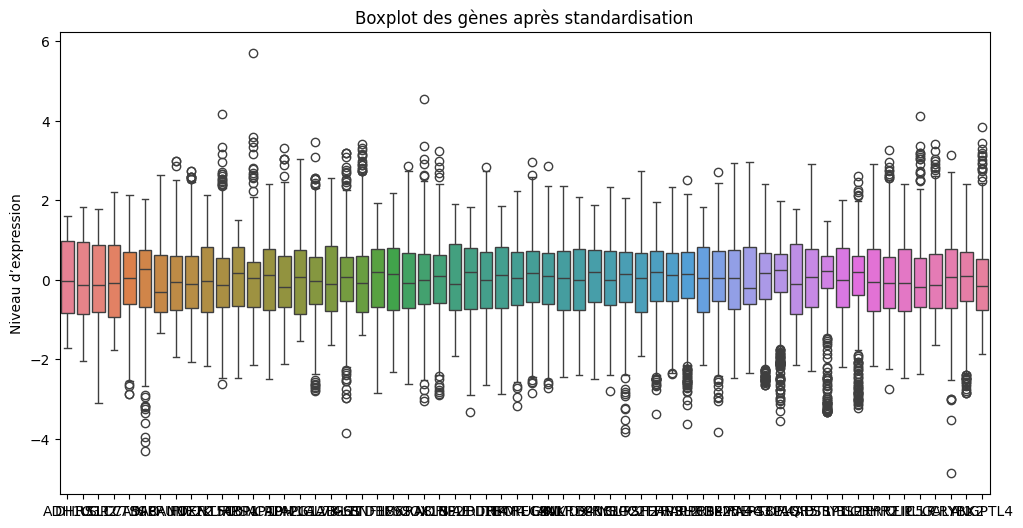

In [17]:
#Boxplot après standardiser
plt.figure(figsize=(12, 6))
sns.boxplot(df_X_train_scaled)
plt.title("Boxplot des gènes après standardisation")
plt.ylabel("Niveau d’expression")
plt.show()

## Algorithmes

Dans cette section, après avoir nettoyé et exploré en profondeur notre dataset, nous allons entraîner plusieurs algorithmes de classification (régression logistique, SVM, KNN, arbre de décision, Random Forest) afin de comparer leurs performances à travers une analyse d'évaluation.

### Regression logistique

La régression logistique est un algorithme de classification qui permet de modéliser la probabilité qu'une observation appartienne à une certaine classe. Contrairement à la régression linéaire, elle utilise une fonction sigmoïde pour transformer les prédictions en valeurs comprises entre 0 et 1, facilitant ainsi la prise de décision binaire.

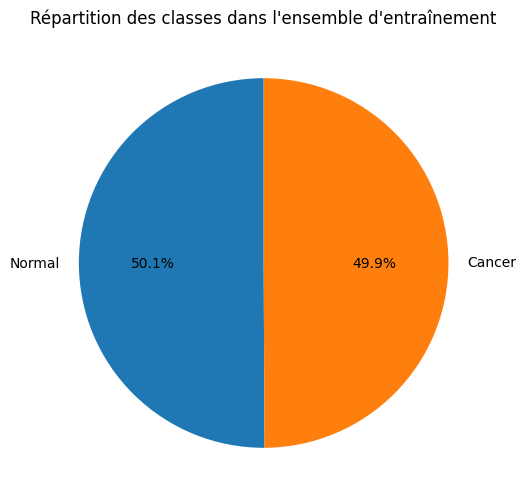

In [18]:
#Calculer les pourcentages de chaque classe colon_cancer
total_samples = len(y_train)
diabetes_counts = y_train.value_counts()
percentage_diabetes = (diabetes_counts / total_samples) * 100

#Données à présenter
labels = ['Normal', 'Cancer']
sizes = percentage_diabetes.values

#Création du diagramme en camembert
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des classes dans l\'ensemble d\'entraînement')
plt.show()

- On voit que les données d'entraînement sont équilibrées avec des pourcentages presque égaux, d'ou on n'a pas besoin d'appliquer des techniques d'équilibrage telles que l'oversampling ou l'undersampling.

#### Entraînement du modèle

In [19]:
#Entraîner le modèle de régression logistique
model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter augmenté pour convergence
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
#Faire des prédictions
y_pred = model.predict(X_test_scaled)

#### Evaluation du modèle

In [21]:
#Evaluation du modèle
#Accuracy
accuracy_original = accuracy_score(y_test, y_pred)
print(f"Accuracy originale: {accuracy_original:.3f}")

Accuracy originale: 1.000


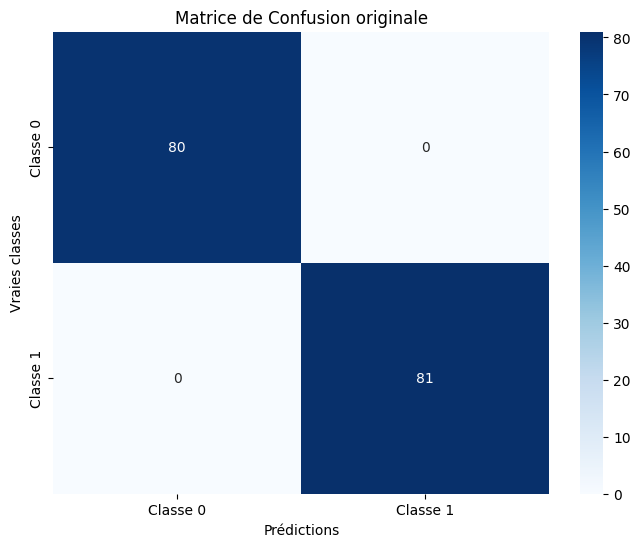

In [22]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion originale")
plt.show()

In [23]:
# Rapport de classification (précision, recall, F1-score)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Rapport de classification :
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        80
     tumoral       1.00      1.00      1.00        81

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



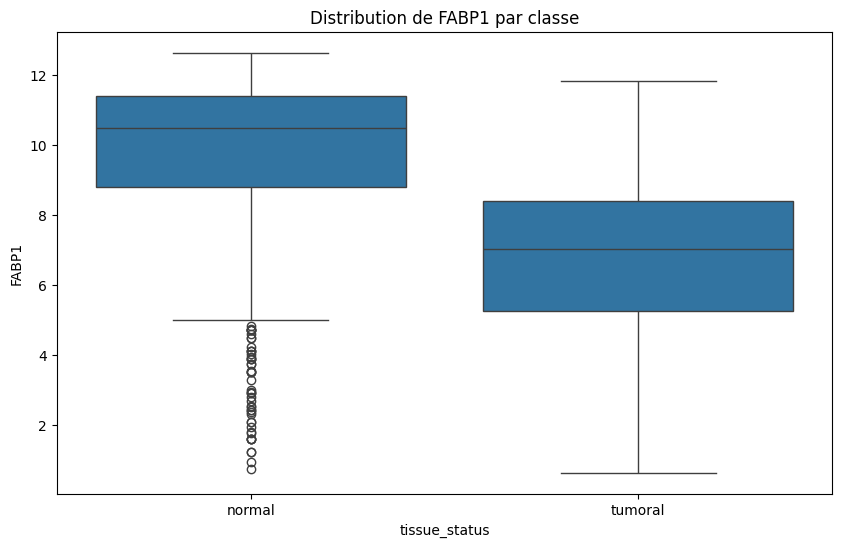

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tissue_status', y='FABP1', data=df)
plt.title("Distribution de FABP1 par classe")
plt.show()

Le modèle de régression logistique appliqué sur ce jeu de données d'expression génique pour classer les tissus "normal" et "tumoral" a obtenu une performance parfaite, avec une accuracy de 1.0, une précision, un rappel et un F1-score de 1.0 pour les deux classes, sur un ensemble de test équilibré de 161 échantillons (80 "normal" et 81 "tumoral"). Cette performance exceptionnelle s'explique par une séparation nette des classes, comme illustré par le boxplot de FABP1, qui montre des distributions disjointes entre les tissus normaux (médiane ~10) et tumoraux (médiane ~6), suggérant que les gènes sélectionnés dans ce dataset sont très discriminants. La standardisation a permis d'uniformiser les échelles des gènes, renforçant l'efficacité du modèle, mais cette perfection indique probablement un dataset synthétique ou simplifié, car une telle précision est rare dans des données biologiques réelles où du bruit et des chevauchements sont attendus. Pour confirmer la robustesse de ces résultats, une validation croisée et une analyse des coefficients des gènes les plus influents, comme FABP1, seraient nécessaires afin d’évaluer la généralisation du modèle à de nouvelles données.

In [25]:
# Validation croisée pour évaluer la robustesse
print("\nValidation croisée (5 folds) sur l'ensemble d'entraînement :")
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Scores par fold :", scores)
print("Moyenne des scores :", scores.mean())
print("Écart-type des scores :", scores.std())

# Analyse des coefficients des gènes les plus influents
coef_df = pd.DataFrame({
    'Gène': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nTop 10 des gènes les plus influents (par valeur absolue du coefficient) :")
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(10))


Validation croisée (5 folds) sur l'ensemble d'entraînement :
Scores par fold : [1. 1. 1. 1. 1.]
Moyenne des scores : 1.0
Écart-type des scores : 0.0

Top 10 des gènes les plus influents (par valeur absolue du coefficient) :
       Gène  Coefficient
44    RNF43     0.945012
3    SLC7A5     0.876286
2      UGP2    -0.718846
5       DAO    -0.672351
26  NEURL1B    -0.647466
13    NCAPH     0.536046
8     FOXF2    -0.531378
27    DDIT4     0.511566
54    CLIC5    -0.467667
0     ADH1C    -0.442681


- Chaque fold de la validation croisée (5 au total) a atteint une accuracy de 100 %, ce qui indique que le modèle a parfaitement classé les données dans toutes les combinaisons d’entraînement/validation.

- La moyenne des scores sur les 5 folds est de 1.0, confirmant une performance parfaite à travers les différents splits.

- Un écart-type de 0.0 signifie qu’il n’y a aucune variabilité entre les performances des folds, ce qui renforce l’idée d’une stabilité exceptionnelle du modèle

- Une validation croisée (5 folds) sur l’ensemble d’entraînement, avec des scores parfaits : [1. 1. 1. 1. 1.], moyenne 1.0, écart-type 0.0 suggère que le modèle n’overfit pas, car il est cohérent sur différents sous-ensembles de données.

In [26]:
#Vérifier les données pour des fuites ou des biais
print("Doublons entre X_train et X_test :", len(set(X_train.index).intersection(X_test.index)))

Doublons entre X_train et X_test : 0


L'absence de doublons entre X_train et X_test (0 doublons) indique qu'il n'y a pas de fuite de données due à des échantillons communs entre les ensembles d'entraînement et de test, ce qui renforce la validité de l'accuracy parfaite obtenue.

##### Injection de bruit:  Évaluer si l’accuracy reste stable ou chute significativement.

Accuracy avec bruit (epsilon=0.5) : 1.000

Matrice de confusion avec bruit :
[[80  0]
 [ 0 81]]

Rapport de classification avec bruit :
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        80
     tumoral       1.00      1.00      1.00        81

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



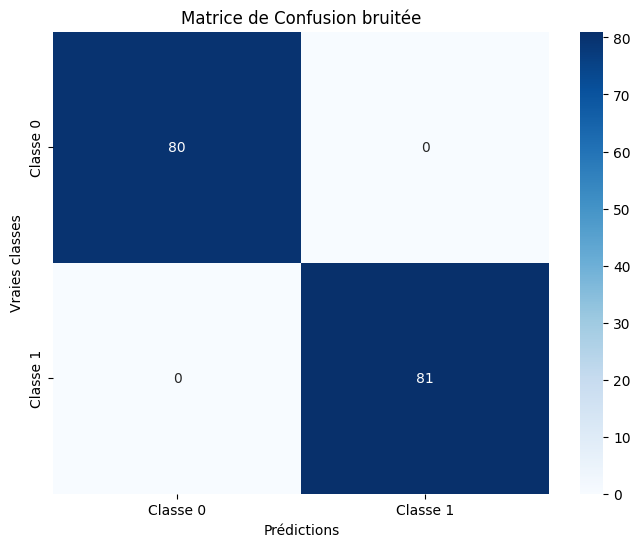

In [27]:
#Ajouter du bruit aux données de test
# Paramètre de bruit (epsilon) : contrôle l'ampleur de la perturbation
epsilon = 0.5
noise = np.random.normal(loc=0, scale=epsilon, size=X_test_scaled.shape)
X_test_noisy = X_test_scaled + noise

#Prédictions sur les données bruitées
y_pred_noisy = model.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy avec bruit (epsilon={epsilon}) : {accuracy_noisy:.3f}")

#Afficher la matrice de confusion pour les données bruitées
conf_matrix_noisy = confusion_matrix(y_test, y_pred_noisy)
print("\nMatrice de confusion avec bruit :")
print(conf_matrix_noisy)

#Rapport de classification pour les données bruitées
print("\nRapport de classification avec bruit :")
print(classification_report(y_test, y_pred_noisy))

#Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_noisy, annot=True, fmt="d", cmap="Blues", xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion bruitée")
plt.show()

On remarque que même après l'injection de bruit (bruit gaussien ou bruit normal) qui suit une distribution normale avec une epsilon de 0.5, le modèle garde la même précision.

#### Feature Extraction

Pour la sélection des caractéristiques dans un modèle de machine learning, l'objectif est d'identifier les variables (ou caractéristiques) les plus importantes pour la prédiction. La sélection des caractéristiques permet de réduire la complexité du modèle, d'améliorer la performance et de diminuer le risque de l'overfitting.

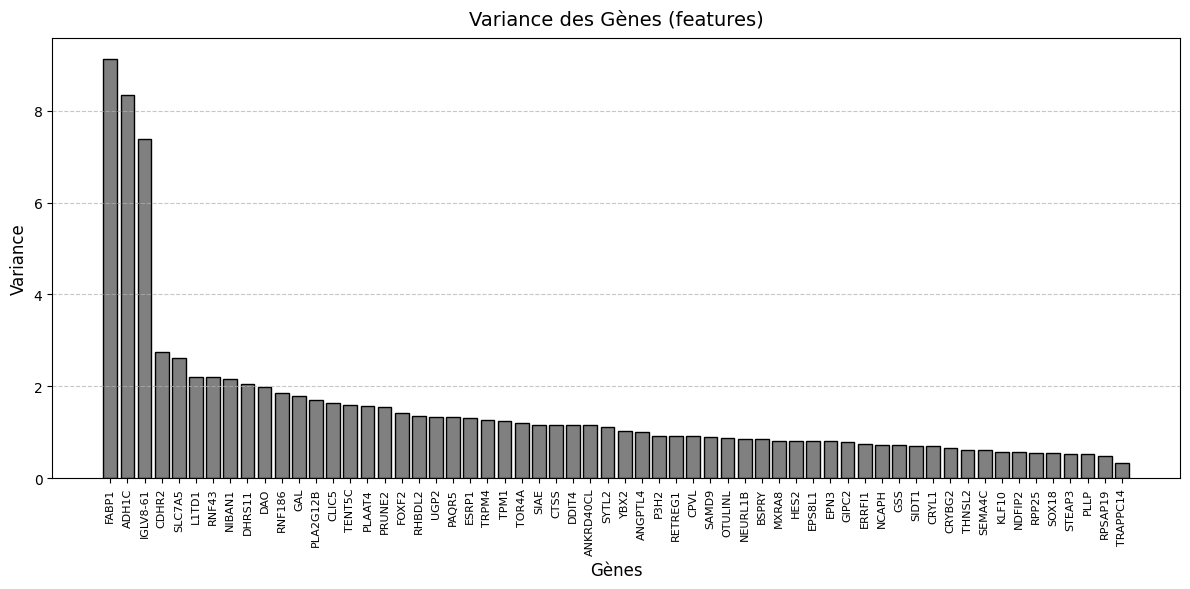

Variance max : 9.128 (Gène : FABP1)
Variance min : 0.339 (Gène : TRAPPC14)


In [28]:
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X, columns=[f"Gene_{i+1}" for i in range(X.shape[1])])

# Calculer les variances des caractéristiques
feature_variances = X.var(axis=0)

# Trier les variances par ordre décroissant
feature_variances_sorted = feature_variances.sort_values(ascending=False)

# Créer le graphique en barres
plt.figure(figsize=(12, 6))  # Plus large pour mieux voir les 60 gènes
plt.bar(feature_variances_sorted.index, feature_variances_sorted.values,
        color='grey', edgecolor='black')  # Couleur et bordures

# Ajouter une grille pour faciliter la lecture
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Étiquettes et titre
plt.xlabel("Gènes", fontsize=12)
plt.ylabel("Variance", fontsize=12)
plt.title("Variance des Gènes (features)", fontsize=14, pad=10)

# Rotation des étiquettes pour lisibilité
plt.xticks(rotation=90, fontsize=8)

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

# Afficher les variances max et min pour info
print(f"Variance max : {feature_variances.max():.3f} (Gène : {feature_variances.idxmax()})")
print(f"Variance min : {feature_variances.min():.3f} (Gène : {feature_variances.idxmin()})")

- Un gène avec une variance élevée varie fortement entre tes échantillons (patients, cellules, etc.). Ces gènes sont importants pour la classification ("normal" vs "tumoral").
- Un gène avec une variance faible a des valeurs très similaires pour tous les échantillons. Ces gènes sont moins discriminants pour la classification.

Nombre de gènes = 1, Accuracy = 0.733
Nombre de gènes = 2, Accuracy = 0.863
Nombre de gènes = 3, Accuracy = 0.882
Nombre de gènes = 4, Accuracy = 0.888
Nombre de gènes = 5, Accuracy = 0.925
Nombre de gènes = 6, Accuracy = 0.913
Nombre de gènes = 7, Accuracy = 0.907
Nombre de gènes = 8, Accuracy = 0.907
Nombre de gènes = 9, Accuracy = 0.907
Nombre de gènes = 10, Accuracy = 0.907
Nombre de gènes = 11, Accuracy = 0.932
Nombre de gènes = 12, Accuracy = 0.957
Nombre de gènes = 13, Accuracy = 0.957
Nombre de gènes = 14, Accuracy = 0.963
Nombre de gènes = 15, Accuracy = 0.994
Nombre de gènes = 16, Accuracy = 1.000
Nombre de gènes = 17, Accuracy = 1.000
Nombre de gènes = 18, Accuracy = 0.994
Nombre de gènes = 19, Accuracy = 0.994
Nombre de gènes = 20, Accuracy = 0.994
Nombre de gènes = 21, Accuracy = 0.994
Nombre de gènes = 22, Accuracy = 0.994
Nombre de gènes = 23, Accuracy = 0.994
Nombre de gènes = 24, Accuracy = 0.994
Nombre de gènes = 25, Accuracy = 0.994
Nombre de gènes = 26, Accuracy = 0

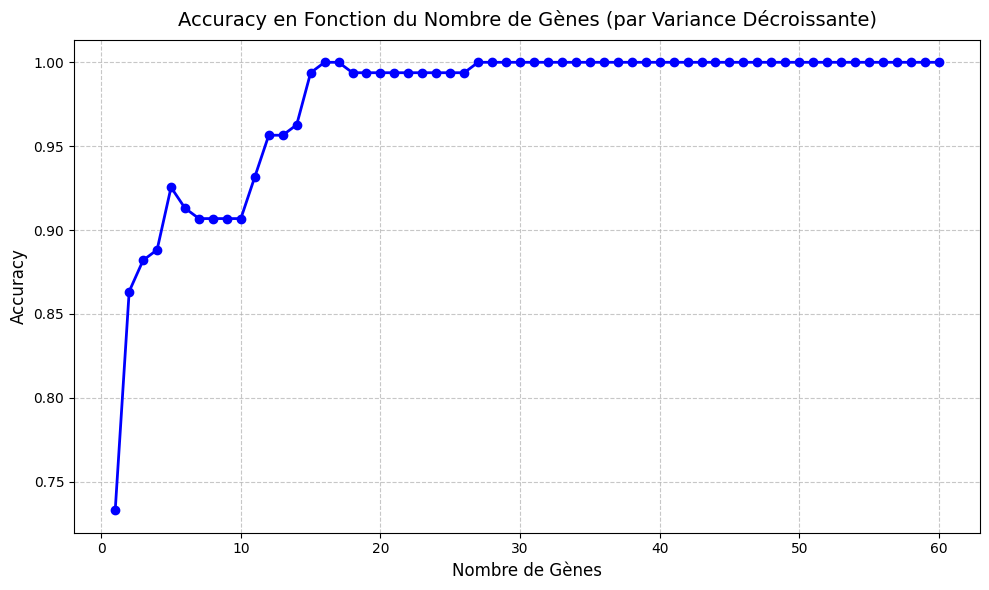

In [29]:
if isinstance(X_train_scaled, np.ndarray):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=[f"Gene_{i+1}" for i in range(X_train_scaled.shape[1])])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=[f"Gene_{i+1}" for i in range(X_test_scaled.shape[1])])

# Calculer les variances et trier par ordre décroissant
feature_variances = X_train_scaled.var(axis=0)
sorted_features = feature_variances.sort_values(ascending=False).index

# Liste des nombres de caractéristiques à tester (1 à 60)
num_features_list = range(1, len(sorted_features) + 1)
accuracies = []

# Boucle sur le nombre de caractéristiques
for num_features in num_features_list:
    # Sélectionner les "num_features" gènes les plus variables
    selected_features = sorted_features[:num_features]
    X_train_subset = X_train_scaled[selected_features]
    X_test_subset = X_test_scaled[selected_features]

    # Entraîner le modèle
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_subset, y_train)

    # Prédire et calculer l’accuracy
    y_pred = model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Nombre de gènes = {num_features}, Accuracy = {accuracy:.3f}")

# Tracer la courbe
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, accuracies, marker='o', color='blue', linestyle='-', linewidth=2)
plt.xlabel("Nombre de Gènes", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Accuracy en Fonction du Nombre de Gènes (par Variance Décroissante)", fontsize=14, pad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Avec les 15 gènes les plus variables, on obtient une accuracy de 1.0, comme avec les 60. Ces 15 capturent l’essentiel de l’information discriminante.
- Les 45 autres gènes (16 à 60) ajoutent peu ou rien, soit parce qu’ils ont une variance faible, soit parce qu’ils sont redondants.

Gènes sélectionnés : ['Gene_42', 'Gene_9', 'Gene_17', 'Gene_5', 'Gene_38', 'Gene_41', 'Gene_15', 'Gene_59', 'Gene_47', 'Gene_19', 'Gene_12', 'Gene_50', 'Gene_23', 'Gene_31', 'Gene_4']
Nouvelles dimensions : Train = (643, 15), Test = (161, 15)
Accuracy avec 15 gènes : 0.994

Matrice de confusion :
[[80  0]
 [ 1 80]]

Rapport de classification :
              precision    recall  f1-score   support

      normal       0.99      1.00      0.99        80
     tumoral       1.00      0.99      0.99        81

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



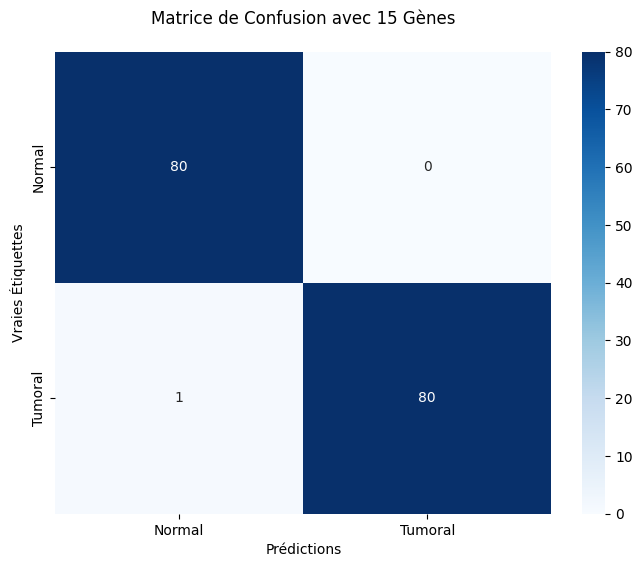

In [30]:
# Convertir en DataFrame si nécessaire
if isinstance(X_train_scaled, np.ndarray):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=[f"Gene_{i+1}" for i in range(X_train_scaled.shape[1])])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=[f"Gene_{i+1}" for i in range(X_test_scaled.shape[1])])

# Calculer les variances et trier par ordre décroissant
feature_variances = X_train_scaled.var(axis=0)
sorted_features = feature_variances.sort_values(ascending=False).index

# Choisir les 15 gènes les plus variables (ajuste si besoin)
num_features = 15
selected_features = sorted_features[:num_features]
print("Gènes sélectionnés :", selected_features.tolist())

# Extraire les données avec ces gènes
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]
print(f"Nouvelles dimensions : Train = {X_train_selected.shape}, Test = {X_test_selected.shape}")

# Réentraîner le modèle
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_selected, y_train)

# Faire des prédictions
y_pred = model.predict(X_test_selected)

# Évaluer
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy avec {num_features} gènes : {accuracy:.3f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(conf_matrix)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Normal', 'Tumoral'], yticklabels=['Normal', 'Tumoral'])
plt.title(f"Matrice de Confusion avec {num_features} Gènes", pad=20)
plt.ylabel("Vraies Étiquettes")
plt.xlabel("Prédictions")
plt.show()

- Dans la classification, **l'extraction de caractéristiques** permet de transformer des données brutes en attributs pertinents qui maximisent la séparation entre les classes, réduisent la dimensionnalité, éliminent le bruit, améliorent la précision des modèles et accélèrent l'entraînement en ne conservant que les informations les plus discriminantes.

- On a vu que l'accuracy reste la même après séléctionner juste 15 gènes au lieu de 60 gènes en simplifiant le modèle et réduisant sa complexité.

### K-Nearest Neighbors (KNN)

KNN repose sur l'idée que des points de données similaires se trouvent à proximité les uns des autres dans un espace multidimensionnel. Pour faire une prédiction sur un nouveau point, l'algorithme identifie les "k" points les plus proches (les voisins) dans l'ensemble de données d'entraînement, en utilisant une mesure de distance (comme la distance euclidienne).

=== Évaluation des différentes valeurs de k ===
k = 1, Accuracy (15 gènes) = 0.988
k = 3, Accuracy (15 gènes) = 0.988
k = 5, Accuracy (15 gènes) = 0.988
k = 7, Accuracy (15 gènes) = 0.988
k = 9, Accuracy (15 gènes) = 0.994
k = 11, Accuracy (15 gènes) = 0.994


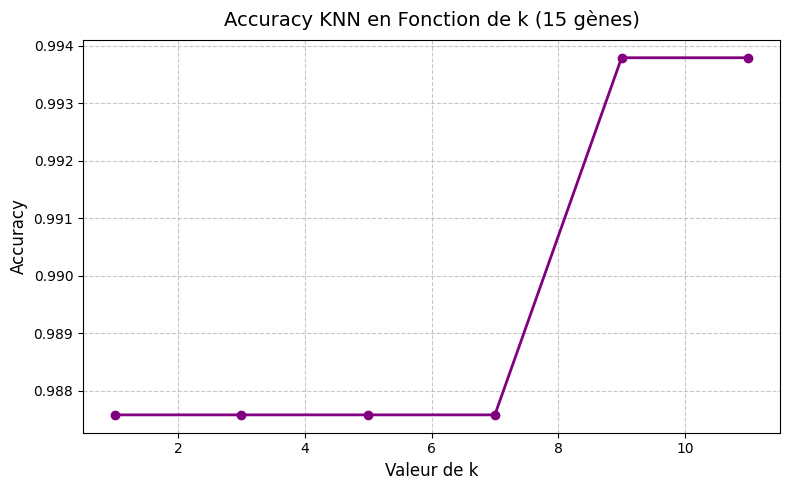

In [45]:
# Paramètres globaux
k_values = [1, 3, 5, 7, 9, 11]
epsilons = [0.5, 3.0]  # Pour la section initiale
extended_epsilons = [0.1, 0.5, 1.0, 2.0, 3.0, 5.0]  # Pour tester la sensibilité au bruit
metrics = ['euclidean', 'manhattan', 'cosine']
selected_features = sorted_features[:15]
X_train_subset = X_train_scaled[selected_features]
X_test_subset = X_test_scaled[selected_features]

print("=== Évaluation des différentes valeurs de k ===")
accuracies_k = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_subset, y_train)
    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_k.append(accuracy)
    print(f"k = {k}, Accuracy (15 gènes) = {accuracy:.3f}")

# Tracer la courbe
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies_k, marker='o', color='purple', linestyle='-', linewidth=2)
plt.xlabel("Valeur de k", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Accuracy KNN en Fonction de k (15 gènes)", fontsize=14, pad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Stabilité pour **k=1** à **k=7** : L’accuracy reste constante à 0.988. Cela suggère que, jusqu’à 7 voisins, KNN fait les mêmes 2 erreurs, probablement sur des échantillons proches de la frontière de décision ou légèrement bruités.
---
- Amélioration à **k=9** et **k=11** : L’accuracy passe à 0.994, ce qui indique qu’en augmentant le nombre de voisins, KNN corrige une des deux erreurs initiales. Avec plus de voisins, le vote majoritaire devient plus robuste, possiblement en "lissant" l’impact d’un point mal placé.

Accuracy KNN avec bruit (epsilon=0.5, 15 gènes, k=9) : 0.963


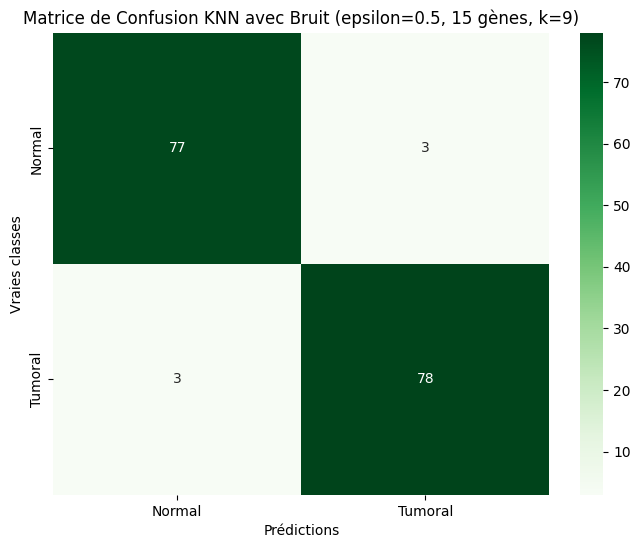

Rapport de classification avec bruit (epsilon=0.5) :
              precision    recall  f1-score   support

      normal       0.96      0.96      0.96        80
     tumoral       0.96      0.96      0.96        81

    accuracy                           0.96       161
   macro avg       0.96      0.96      0.96       161
weighted avg       0.96      0.96      0.96       161

Accuracy KNN avec bruit (epsilon=3.0, 15 gènes, k=9) : 0.658


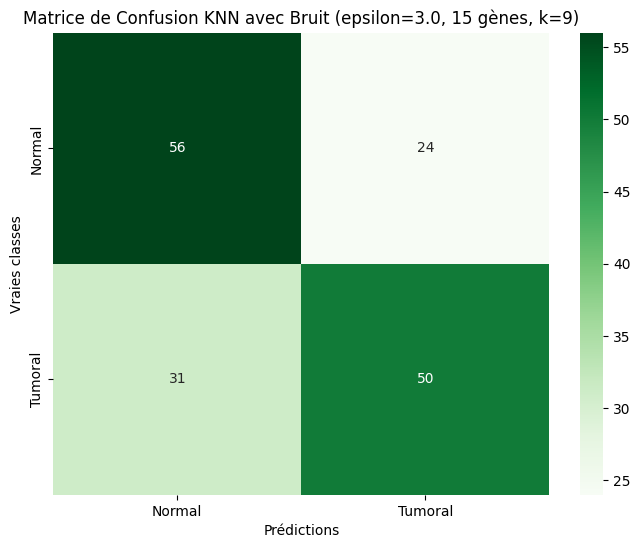

Rapport de classification avec bruit (epsilon=3.0) :
              precision    recall  f1-score   support

      normal       0.64      0.70      0.67        80
     tumoral       0.68      0.62      0.65        81

    accuracy                           0.66       161
   macro avg       0.66      0.66      0.66       161
weighted avg       0.66      0.66      0.66       161



In [46]:
# Liste des valeurs d'epsilon à tester
epsilons = [0.5, 3.0]

# Boucle sur les deux valeurs d'epsilon
for epsilon in epsilons:
    # Générer le bruit
    noise = np.random.normal(loc=0, scale=epsilon, size=X_test_subset.shape)
    X_test_noisy = X_test_subset + noise

    # Entraîner et prédire avec KNN (k=9)
    knn_model = KNeighborsClassifier(n_neighbors=9)
    knn_model.fit(X_train_subset, y_train)
    y_pred_noisy = knn_model.predict(X_test_noisy)
    accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
    print(f"Accuracy KNN avec bruit (epsilon={epsilon}, 15 gènes, k=9) : {accuracy_noisy:.3f}")

    # Matrice de confusion
    conf_matrix_noisy = confusion_matrix(y_test, y_pred_noisy)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_noisy, annot=True, fmt="d", cmap="Greens", xticklabels=['Normal', 'Tumoral'], yticklabels=['Normal', 'Tumoral'])
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies classes")
    plt.title(f"Matrice de Confusion KNN avec Bruit (epsilon={epsilon}, 15 gènes, k=9)")
    plt.show()

    # Rapport de classification
    print(f"Rapport de classification avec bruit (epsilon={epsilon}) :")
    print(classification_report(y_test, y_pred_noisy))

**Sensibilité au bruit**  
 * **Epsilon=0.5** : Le bruit est modéré (écart-type de 0.5 sur des données standardisées, qui ont déjà un écart-type de 1). KNN reste très robuste, surtout avec k=9.
 * **Epsilon=3.0** : Le bruit est très fort. Cela perturbe massivement les distances entre points, et KNN fait beaucoup plus d'erreurs.
 * **Conclusion** : KNN est robuste à un bruit modéré, mais sa performance chute significativement avec un bruit important, confirmant sa sensibilité.

**Comparaison rapide avec la régression logistique**
 * **Régression logistique** : Avec epsilon=0.5, elle avait une accuracy de 1.0, et même avec un bruit plus fort, elle serait probablement plus stable, car elle repose sur une frontière linéaire, moins affectée par des perturbations locales.
 * **KNN** : Avec epsilon=0.5, l'accuracy est élevée (0.975), mais avec epsilon=3.0, elle chute à 0.708. Cela montre que KNN est beaucoup plus sensible au bruit que la régression logistique, surtout quand le bruit devient important.

In [47]:
print("\n=== Validation croisée ===")

knn_model = KNeighborsClassifier(n_neighbors=9)
scores = cross_val_score(knn_model, X_train_subset, y_train, cv=5)
print(f"Validation croisée (k=9, 15 gènes) : {scores.mean():.3f} ± {scores.std():.3f}")


=== Validation croisée ===
Validation croisée (k=9, 15 gènes) : 0.983 ± 0.010


- La validation croisée est effectuée sur les données d’entraînement (643 échantillons, 5 folds → environ 514 échantillons par fold pour l’entraînement, 129 pour la validation à chaque fold). Une moyenne de 0.983 signifie que KNN performe bien sur des sous-ensembles différents des données d’entraînement, ce qui est un excellent signe de généralisation.
---
- Si KNN était en overfitting, on s’attendrait à :
    * Une accuracy sur l’entraînement beaucoup plus élevée (ex. 1.0).
    * Une accuracy en validation croisée ou sur le test beaucoup plus faible (ex. 0.9).

- Ici, les trois métriques (entraînement, test, validation croisée) sont très proches, et l’écart-type est faible. Cela confirme que KNN n’est pas en overfitting : il généralise bien sur ton dataset.


=== Test des différentes métriques de distance ===

Métrique : euclidean
Accuracy sans bruit (k=9) : 0.994
Accuracy avec bruit (epsilon=0.5, k=9) : 0.969


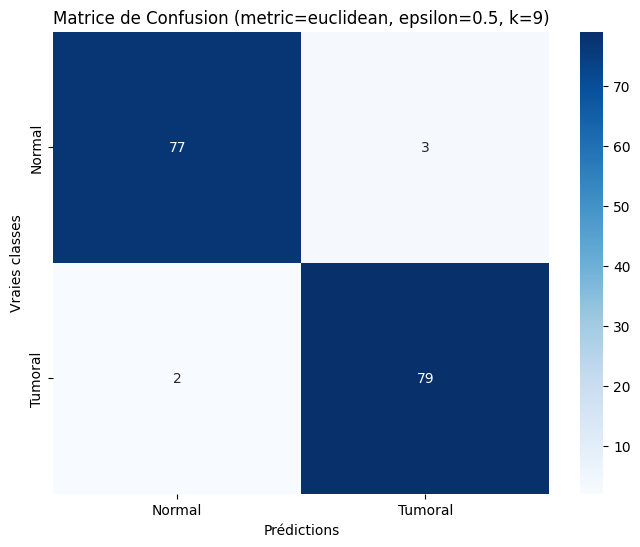


Métrique : manhattan
Accuracy sans bruit (k=9) : 1.000
Accuracy avec bruit (epsilon=0.5, k=9) : 0.975


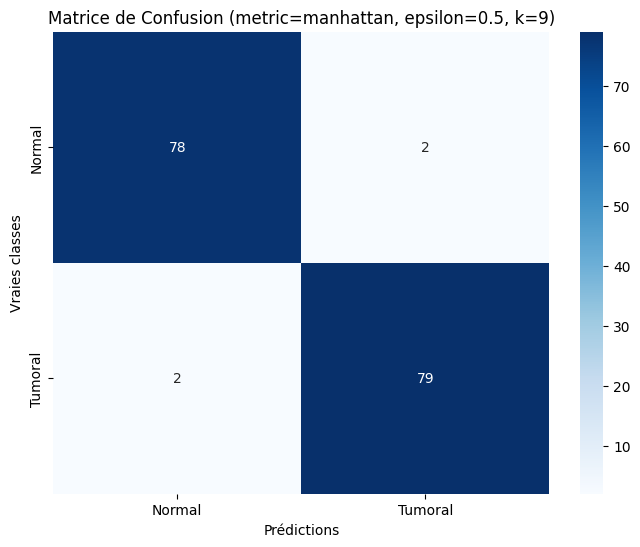


Métrique : cosine
Accuracy sans bruit (k=9) : 0.994
Accuracy avec bruit (epsilon=0.5, k=9) : 0.975


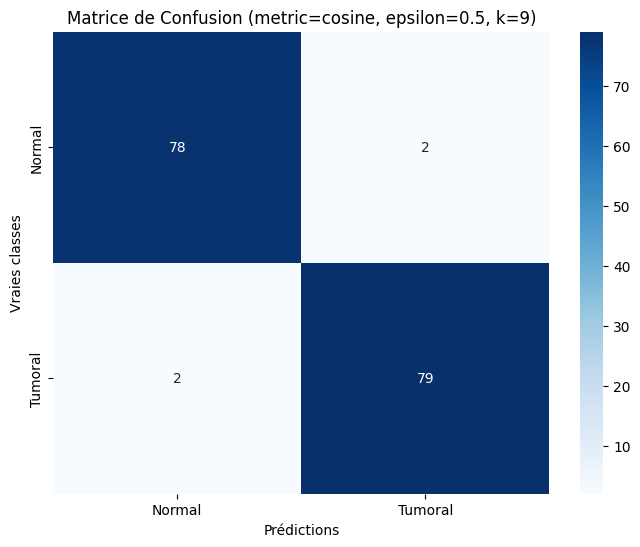

In [48]:

print("\n=== Test des différentes métriques de distance ===")
for metric in metrics:
    print(f"\nMétrique : {metric}")

    # Tester sans bruit
    knn_model = KNeighborsClassifier(n_neighbors=9, metric=metric)
    knn_model.fit(X_train_subset, y_train)
    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy sans bruit (k=9) : {accuracy:.3f}")

    # Tester avec bruit avec epsilon=0.5
    epsilon = 0.5
    noise = np.random.normal(loc=0, scale=epsilon, size=X_test_subset.shape)
    X_test_noisy = X_test_subset + noise

    knn_model = KNeighborsClassifier(n_neighbors=9, metric=metric)
    knn_model.fit(X_train_subset, y_train)
    y_pred_noisy = knn_model.predict(X_test_noisy)
    accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
    print(f"Accuracy avec bruit (epsilon={epsilon}, k=9) : {accuracy_noisy:.3f}")

    # Matrice de confusion
    conf_matrix_noisy = confusion_matrix(y_test, y_pred_noisy)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_noisy, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Normal', 'Tumoral'], yticklabels=['Normal', 'Tumoral'])
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies classes")
    plt.title(f"Matrice de Confusion (metric={metric}, epsilon={epsilon}, k=9)")
    plt.show()

- Lorsque les données sont propres, la distance de Manhattan atteint une précision parfaite de 1.000, indiquant qu'elle classe toutes les observations correctement. Les distances Euclidienne et Cosinus affichent également une excellente précision de 0.994, montrant qu'elles sont aussi très efficaces en l'absence de bruit.

- Lorsqu'un bruit de 0.5 est ajouté aux données, une diminution de précision est observée pour toutes les métriques.

**Différence dans le calcul des distances :**

- **Distance Euclidienne** :
  - Cette métrique **amplifie** les variations extrêmes (comme le bruit) en les mettant au carré.
  - Résultat : la classification devient plus instable lorsque du bruit est ajouté.

- **Distance de Manhattan** :
  - Elle **ne met pas au carré** les écarts, ce qui réduit l'effet des perturbations.
  - Résultat : même avec du bruit, la classification reste plus stable.

- **Distance Cosinus** :
  - Mesure l'**angle** entre deux vecteurs au lieu d'une vraie distance.
  - Moins affectée par les écarts de magnitude, ce qui explique sa bonne performance.
